# libraries + load dataset + specify columns


In [1]:
#################################################################################
# First, we bring in the required libraries for our task.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#################################################################################
# Load datasets for training and testing
#################################################################################
# Using pandas, we read the datasets. Since the dataset lacks headers, we set the header parameter to None.
AG_train_data = pd.read_csv("data1.csv", header=None)
AG_test_data = pd.read_csv("data3.csv", header=None)
# Extract features and labels from the datasets
AG_train_features = AG_train_data.iloc[:, :-1].values.T
AG_train_labels = AG_train_data.iloc[:, -1].values
AG_test_features = AG_test_data.iloc[:, :-1].values.T
AG_test_labels = AG_test_data.iloc[:, -1].values

# Split train and test + Normalization


In [3]:
#################################################################################
# In the previous section, we loaded the datasets. Now, we manipulate these datasets.
# We transpose the feature matrix as MLP classifiers require column-wise data.
AG_train_features = AG_train_data.iloc[:, :-1].values.T
AG_train_labels = AG_train_data.iloc[:, -1].values
AG_test_features = AG_test_data.iloc[:, :-1].values.T
AG_test_labels = AG_test_data.iloc[:, -1].values
#################################################################################
# Normalizing the data
#################################################################################
# Here, we normalize the input features to fall between 0 and 1, which aids in stable training.
AG_scaler = MinMaxScaler()
AG_train_features = AG_scaler.fit_transform(AG_train_features.T).T
AG_test_features = AG_scaler.transform(AG_test_features.T).T


# Function of multi perseptrons


In [8]:
#################################################################################
# Define the MLP function with feedforward, backpropagation, loss calculation, and testing.
# The function has hyperparameter configurations, defines layers, and applies optimization to minimize the error.
# Testing is performed after the training to return results.
def AG_mlp(AG_train_features, AG_train_labels, AG_test_features, AG_maxEpochs=10000):
    AG_N = AG_train_features.shape[1]
    AG_d = AG_train_features.shape[0]
    AG_classes = int(np.max(AG_train_labels))
#################################################################################
# Initialization
    AG_hidden = 10
    AG_loss_values = []                                                                 # Stores loss over epochs
    AG_learning_rate = 0.1
#################################################################################
# Initialize the training output matrix
    AG_train_output = np.zeros((AG_classes, AG_N))
    for i in range(AG_N):
        AG_train_output[int(AG_train_labels[i]) - 1, i] = 1                              # Adjusted for 0-based indexing
#################################################################################
# Add bias to the input data
    AG_extended_input = np.vstack((AG_train_features, np.ones(AG_N)))
#################################################################################
# Initialize weight matrices with small random values
    AG_weights_hidden = (np.random.rand(AG_d + 1, AG_hidden) - 0.5) / 10
    AG_weights_output = (np.random.rand(AG_hidden + 1, AG_classes) - 0.5) / 10
    plt.style.use('ggplot')                                                             # Set a plot style
    AG_fig, AG_ax = plt.subplots(figsize=(10, 6))                                       # Define larger plot size
    AG_t = 0
    while AG_t < AG_maxEpochs:
        AG_t += 1
#################################################################################
# Feedforward operation
        AG_hidden_activation = np.dot(AG_weights_hidden.T, AG_extended_input)
        AG_hidden_output = 1 / (1 + np.exp(-AG_hidden_activation))                      # Sigmoid function
        AG_extended_hidden = np.vstack((AG_hidden_output, np.ones(AG_N)))
        AG_output_activation = np.dot(AG_weights_output.T, AG_extended_hidden)
        AG_output_result = 1 / (1 + np.exp(-AG_output_activation))                      # Sigmoid function output
#################################################################################
# Calculate the loss value (Mean Squared Error)
        AG_loss = 0.5 * np.sum((AG_train_output - AG_output_result) ** 2)
        AG_loss_values.append(AG_loss)
        if AG_t % 1000 == 0:
            AG_ax.semilogy(
                range(1, AG_t + 1), 
                AG_loss_values, 
                color='blue', 
                linestyle='--', 
                linewidth=2, 
                marker='o', 
                markersize=4
            )
            AG_ax.set_title(f'Training Progress at Epoch {AG_t}', fontsize=14, color='darkgreen')
            AG_ax.set_xlabel('Epochs', fontsize=12)
            AG_ax.set_ylabel('Training Error', fontsize=12)
            AG_ax.grid(True, linestyle=':', color='gray', alpha=0.7)
            plt.draw()
#################################################################################
# Early stopping conditions
        if AG_loss < 1e-4:                                                              # Stop if the loss is very low
            break
        if AG_t > 1 and abs(AG_loss_values[-1] - AG_loss_values[-2]) < 1e-6:            # Stop if no improvement
            break
#################################################################################
# Update sensitivities and weights (backpropagation)
        AG_delta_output = (AG_output_result - AG_train_output) * AG_output_result * (1 - AG_output_result)
        AG_delta_hidden = np.dot(AG_weights_output[:-1], AG_delta_output) * AG_hidden_output * (1 - AG_hidden_output)
        AG_delta_weights_output = -AG_learning_rate * np.dot(AG_extended_hidden, AG_delta_output.T)
        AG_delta_weights_hidden = -AG_learning_rate * np.dot(AG_extended_input, AG_delta_hidden.T)
        AG_weights_output += AG_delta_weights_output
        AG_weights_hidden += AG_delta_weights_hidden
#################################################################################
# Testing the model with test data
    AG_N_test = AG_test_features.shape[1]
    AG_extended_test_input = np.vstack((AG_test_features, np.ones(AG_N_test)))
    AG_hidden_activation_test = np.dot(AG_weights_hidden.T, AG_extended_test_input)
    AG_hidden_output_test = 1 / (1 + np.exp(-AG_hidden_activation_test))
    AG_extended_hidden_test = np.vstack((AG_hidden_output_test, np.ones(AG_N_test)))
    AG_output_activation_test = np.dot(AG_weights_output.T, AG_extended_hidden_test)
    AG_test_result = 1 / (1 + np.exp(-AG_output_activation_test))
    AG_test_labels = np.argmax(AG_test_result, axis=0) + 1                               # Adjusted for 1-based indexing
    return AG_test_labels, AG_t, AG_weights_hidden, AG_weights_output


# I used founction and plot the result


Predicted classes (first 10): [1 1 1 1 1 1 1 1 1 1]
Total epochs:  7750


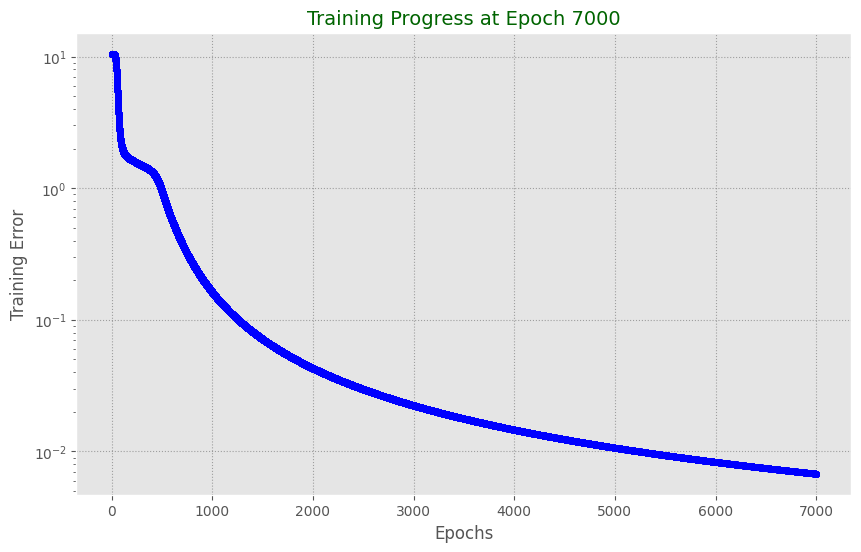

In [9]:
#################################################################################
# Call the MLP function
#################################################################################
# In this section, we call the `AG_mlp` function, store the results, and display them.
AG_predicted, AG_epochs, AG_weights_hidden, AG_weights_output = AG_mlp(AG_train_features, AG_train_labels, AG_test_features)
print("Predicted classes (first 10):", AG_predicted[:10])                               # You can modify the range to display more/less
print("Total epochs: ", AG_epochs)
